In [1]:
import hc_lib.plots.figlib as flib
flib.siteFG()
from figrid.figrid import DataList
from figrid.figrid import Figrid
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt


/software/spack-software/2020.05.14/linux-rhel8-ivybridge/gcc-8.4.0/python-3.7.7-zgcjuclie3fiis4ljkrfp4c4j6fkoa62/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
box = 'tng100'
snap = [99, 67]
axis = 0
res = 800
files = ['galaxygrid', 'galaxyXgalaxy']
master = DataList()
for f in files:
    for s in snap:
        rlib = flib.load(box, s, axis, res, f)
        kmin = rlib.results['pk'][0].xvalues[0]
        BOX = rlib.results['pk'][0].props['box']
        RES = rlib.results['pk'][0].props['grid_resolution']
        master.loadResults(rlib.results['pk'])

smfont = 10
larfont = 12
cdict = flib.getCdict()
real_color = cdict['real']
redshift_color = cdict['redshift']
blue_color = cdict['blue']
red_color = cdict['red']
XBORDER, YBORDER = flib.getBorders()
XLIM = flib.getXlim()

The row values for ['space']: ['real', 'redshift']
The column values for ['color']: ['blue', 'red', 'resolved']


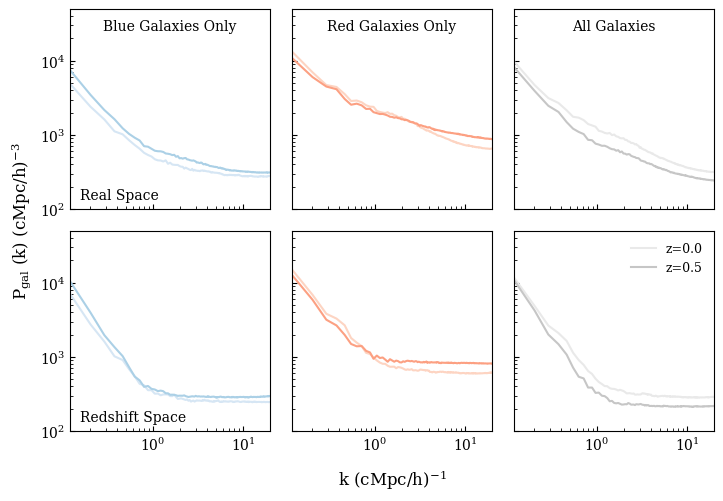

In [3]:
fg = Figrid(DataList(master.getMatching({'is_auto':True})))
fg.setRowOrder(['real', 'redshift'])
fg.arrange('space', 'color', panel_length = 2, xborder = XBORDER, yborder = YBORDER)
labs = ['z=0.0', 'z=0.5']
for s in range(len(snap)):
    colr = cdict['zevo']['red'][s]
    fg.setPlotArgs({'color':'red', 'snapshot':snap[s]}, {'color':colr, 'label':labs[s]})
    colr = cdict['zevo']['blue'][s]
    fg.setPlotArgs({'color':'blue', 'snapshot':snap[s]}, {'color':colr, 'label':labs[s]})
    colr = cdict['zevo']['resolved'][s]
    fg.setPlotArgs({'color':'resolved', 'snapshot':snap[s]}, {'color':colr, 'label':labs[s]})

fg.plot()
axkw = {}
axkw['xscale'] = 'log'
axkw['xlim'] = XLIM
axkw['yscale'] = 'log'
axkw['ylim'] = [1e2, 5e4]
fg.setAxisParams(axkw)
# lighter colors don't show up very well with the darker face colors
# trgba = mpl.colors.to_rgba
# fg.setAxisParams({'facecolor':trgba(cdict['real'], 0.05)}, (0, slice(None)))
# fg.setAxisParams({'facecolor':trgba(cdict['redshift'], 0.05)}, (1, slice(None)))

xtxtkw = {'fontsize':larfont, 'va':'bottom', 'ha':'center'}
ytxtkw = {'fontsize':larfont, 'va':'center', 'ha':'right'}
flib.pklabels(fg, ysub = r'\rm{gal}', xtxtkw = xtxtkw, ytxtkw = ytxtkw)

fg.setDefaultTicksParams()
fg.setTicks({'labelsize':smfont, 'direction':'in'})

fg.setRowLabels(['Real Space', 'Redshift Space'], [0.05, 0.05])
fg.setColLabels(['Blue Galaxies Only', 'Red Galaxies Only', 'All Galaxies'], [0.5, 0.95], {'ha':'center', 'va':'top'})

lkw = {'frameon':False, 'fontsize':smfont - 1, 'loc':'upper right'}
fg.drawLegend(lkw, (1,2))

In [4]:
fg.save('galaxy_auto_z-evo_FINAL.pdf')

In [12]:
dl = DataList(master.getMatching({'is_auto':False}))
print(dl.getAttrs())

['result_runtime',
 'is_auto',
 'box',
 'simname',
 'sim_resolution',
 'num_part',
 'grid_resolution',
 'snapshot',
 'redshift',
 'axis',
 'fieldname',
 'is_hydrogen',
 'is_atomic',
 'is_molecular',
 'is_particle',
 'is_groupcat',
 'is_matter',
 'mas',
 'space',
 'compute_xi',
 'compute_slice',
 'color',
 'gal_species',
 'gal_res',
 'color_cut']

In [14]:
dl.getAttrVals('color')

['red_blue', 'blue_red']

In [ ]:
fg = Figrid()
fg.setRowOrder(['real', 'redshift'])
fg.arrange('space', 'color', panel_length = 2, xborder = XBORDER, yborder = YBORDER)
labs = ['z=0.0', 'z=0.5']
for s in range(len(snap)):
    colr = cdict['zevo']['red'][s]
    fg.setPlotArgs({'color':'red', 'snapshot':snap[s]}, {'color':colr, 'label':labs[s]})
    colr = cdict['zevo']['blue'][s]
    fg.setPlotArgs({'color':'blue', 'snapshot':snap[s]}, {'color':colr, 'label':labs[s]})
    colr = cdict['zevo']['resolved'][s]
    fg.setPlotArgs({'color':'resolved', 'snapshot':snap[s]}, {'color':colr, 'label':labs[s]})

fg.plot()
axkw = {}
axkw['xscale'] = 'log'
axkw['xlim'] = XLIM
axkw['yscale'] = 'log'
axkw['ylim'] = [1e2, 5e4]
fg.setAxisParams(axkw)
# lighter colors don't show up very well with the darker face colors
# trgba = mpl.colors.to_rgba
# fg.setAxisParams({'facecolor':trgba(cdict['real'], 0.05)}, (0, slice(None)))
# fg.setAxisParams({'facecolor':trgba(cdict['redshift'], 0.05)}, (1, slice(None)))

xtxtkw = {'fontsize':larfont, 'va':'bottom', 'ha':'center'}
ytxtkw = {'fontsize':larfont, 'va':'center', 'ha':'right'}
flib.pklabels(fg, ysub = r'\rm{gal}', xtxtkw = xtxtkw, ytxtkw = ytxtkw)

fg.setDefaultTicksParams()
fg.setTicks({'labelsize':smfont, 'direction':'in'})

fg.setRowLabels(['Real Space', 'Redshift Space'], [0.05, 0.05])
fg.setColLabels(['Blue Galaxies Only', 'Red Galaxies Only', 'All Galaxies'], [0.5, 0.95], {'ha':'center', 'va':'top'})

lkw = {'frameon':False, 'fontsize':smfont - 1, 'loc':'upper right'}
fg.drawLegend(lkw, (1,2))